In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from pandas import DataFrame
from datetime import datetime,tzinfo
from pytz import timezone
import time
import pytz
import csv


plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Naive Appproaches

In [2]:
bitcoin = pd.read_csv('post_eda.csv')
bitcoin.head()

,Unnamed: 0,slug,symbol,name,date,ranknow,open,high,low,close,...,29 Day Rolling Mean,29 Day SD,30 Day Shifted Rolling Mean,30 Day Shifted SD,30 Day Rolling Mean,30 Day SD,31 Day Shifted Rolling Mean,31 Day Shifted SD,31 Day Rolling Mean,31 Day SD
0,243,bitcoin,BTC,Bitcoin,2013-12-27,1,763.28,777.51,713.60,735.07,...,830.674828,55.790794,831.439333,54.980135,831.439333,54.980135,833.176129,54.914161,833.176129,54.914161
1,244,bitcoin,BTC,Bitcoin,2013-12-28,1,737.98,747.06,705.35,727.83,...,830.674828,55.790794,831.439333,54.980135,831.439333,54.980135,833.176129,54.914161,833.176129,54.914161
2,245,bitcoin,BTC,Bitcoin,2013-12-29,1,728.05,748.61,714.44,745.05,...,830.674828,55.790794,831.439333,54.980135,831.439333,54.980135,833.176129,54.914161,833.176129,54.914161
3,246,bitcoin,BTC,Bitcoin,2013-12-30,1,741.35,766.60,740.24,756.13,...,830.674828,55.790794,831.439333,54.980135,831.439333,54.980135,833.176129,54.914161,833.176129,54.914161
4,247,bitcoin,BTC,Bitcoin,2013-12-31,1,760.32,760.58,738.17,754.01,...,830.674828,55.790794,831.439333,54.980135,831.439333,54.980135,833.176129,54.914161,833.176129,54.914161


In [3]:
windows = list(range(2, 32)) 
def isEvent_rollingmean(row, num_days):
    diff = abs(row['close'] - row[str(num_days) + ' Day Rolling Mean'])
    return 1 if diff >= 2 * row[str(num_days) + ' Day SD'] else 0
events = []
for window in windows:
    bitcoin['isEvent based on 2SD'] = bitcoin.apply(lambda x: isEvent_rollingmean(x, window), axis=1)
    try:
        event = list(bitcoin['isEvent based on 2SD'].value_counts())[1]
    except:
        event = 0
    events += [event]

In [4]:
bitcoin['prevClose'] = list([bitcoin['close'].values[0]] + list(bitcoin['close'].values))[:-1]
bitcoin['percentChange'] = (bitcoin['close'] - bitcoin['prevClose']) / bitcoin['prevClose']
bitcoin.head(10)

,Unnamed: 0,slug,symbol,name,date,ranknow,open,high,low,close,...,30 Day Shifted SD,30 Day Rolling Mean,30 Day SD,31 Day Shifted Rolling Mean,31 Day Shifted SD,31 Day Rolling Mean,31 Day SD,isEvent based on 2SD,prevClose,percentChange
0,243,bitcoin,BTC,Bitcoin,2013-12-27,1,763.28,777.51,713.60,735.07,...,54.980135,831.439333,54.980135,833.176129,54.914161,833.176129,54.914161,0,735.07,0.000000
1,244,bitcoin,BTC,Bitcoin,2013-12-28,1,737.98,747.06,705.35,727.83,...,54.980135,831.439333,54.980135,833.176129,54.914161,833.176129,54.914161,0,735.07,-0.009849
2,245,bitcoin,BTC,Bitcoin,2013-12-29,1,728.05,748.61,714.44,745.05,...,54.980135,831.439333,54.980135,833.176129,54.914161,833.176129,54.914161,0,727.83,0.023659
3,246,bitcoin,BTC,Bitcoin,2013-12-30,1,741.35,766.60,740.24,756.13,...,54.980135,831.439333,54.980135,833.176129,54.914161,833.176129,54.914161,0,745.05,0.014871
4,247,bitcoin,BTC,Bitcoin,2013-12-31,1,760.32,760.58,738.17,754.01,...,54.980135,831.439333,54.980135,833.176129,54.914161,833.176129,54.914161,0,756.13,-0.002804
5,248,bitcoin,BTC,Bitcoin,2014-01-01,1,754.97,775.35,754.97,771.40,...,54.980135,831.439333,54.980135,833.176129,54.914161,833.176129,54.914161,0,754.01,0.023063
6,249,bitcoin,BTC,Bitcoin,2014-01-02,1,773.44,820.31,767.21,802.39,...,54.980135,831.439333,54.980135,833.176129,54.914161,833.176129,54.914161,0,771.40,0.040174
7,250,bitcoin,BTC,Bitcoin,2014-01-03,1,802.85,834.15,789.12,818.72,...,54.980135,831.439333,54.980135,833.176129,54.914161,833.176129,54.914161,0,802.39,0.020352
8,251,bitcoin,BTC,Bitcoin,2014-01-04,1,823.27,859.51,801.67,859.51,...,54.980135,831.439333,54.980135,833.176129,54.914161,833.176129,54.914161,0,818.72,0.049822
9,252,bitcoin,BTC,Bitcoin,2014-01-05,1,858.55,952.40,854.52,933.53,...,54.980135,831.439333,54.980135,833.176129,54.914161,833.176129,54.914161,0,859.51,0.086119


In [5]:
len(bitcoin.loc[abs(bitcoin['percentChange']) > 0.10]) # finding a good threshold --> 0.10 for now.

63

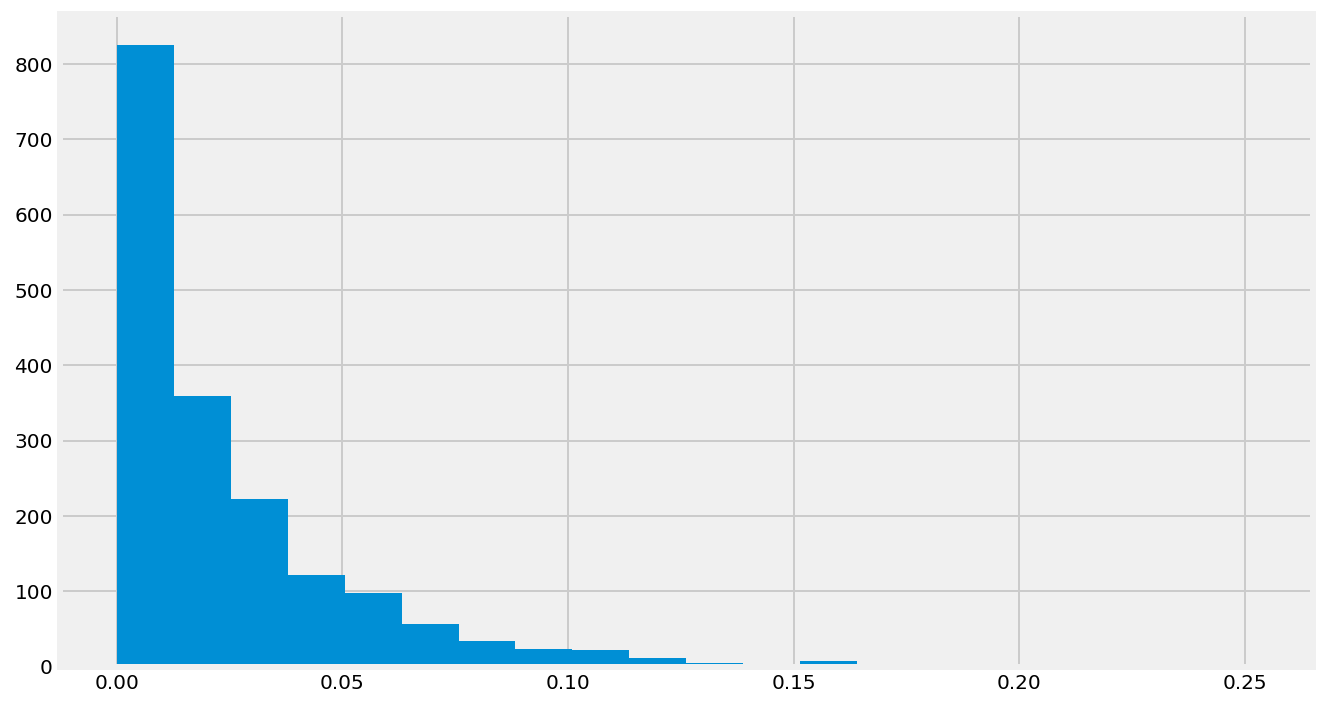

In [6]:
plt.figure(figsize=(10,6))
plt.hist(abs(bitcoin['percentChange']), bins=20);

In [7]:
def isEvent_percent(percentChange):
    return abs(percentChange) > 0.10
    
# bitcoin['isEventBaseline'] = bitcoin.apply(lambda x: isEventBaseline(x, 7), axis=1)
bitcoin['Naive Percent Event'] = bitcoin['percentChange'].apply(isEvent_percent)
list(bitcoin['Naive Percent Event'].value_counts())[-1]

63

In [10]:
df = bitcoin[['open', 'high', 'low', 'close', 'volume', 'market', 'close_ratio', 
              'spread', 'prevClose', '7 Day Rolling Mean', '7 Day SD', 
              'percentChange', 'isEvent based on 2SD', 'Naive Percent Event']]

In [11]:
df.to_csv('baseline_def_kaggle.csv')